# CIFAR-10

This dataset consists of 60,000 images divided into 10 target classes, with each category containing 6000 images of shape (32 * 32). <br>
The 10 different classes of this dataset are:

    0. Airplane
    1. Car
    2. Bird
    3. Cat
    4. Deer
    5. Dog
    6. Frog
    7. Horse
    8. Ship
    9. Truck


## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Loading Data and Preprocessing

CIFAR-10 dataset is already available in the datasets module of Keras. We do not need to download it; we can directly import it from keras.datasets.

In [2]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (valid_images, valid_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print('Train images :', len(train_images))
print('Test images :',  len(valid_images))
print('Image Shape: ', train_images[0].shape)

Train images : 50000
Test images : 10000
Image Shape:  (32, 32, 3)


### Plot some images from the dataset

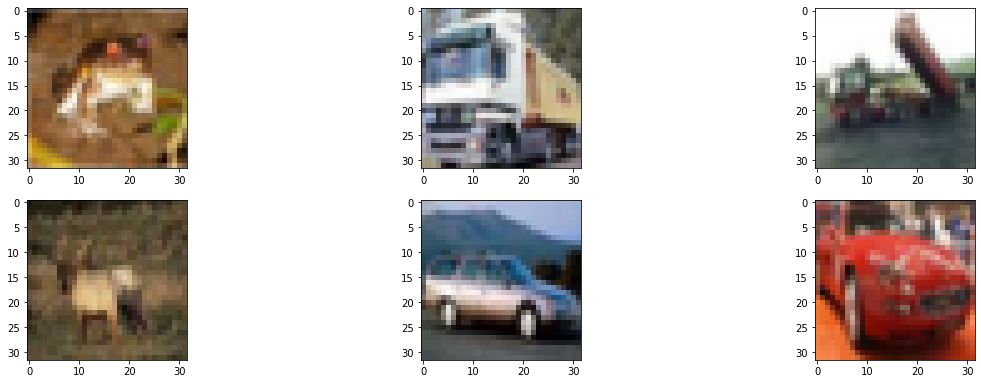

In [4]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_images[i])
plt.show()

### normalizing data


In [5]:
train_images = train_images / 255.0
valid_images = valid_images / 255.0

### Data Augmentation

In [6]:
# Flip the images
augmented_data = tf.image.flip_left_right(train_images)

# concatenate orignal images and fliped images
train_images = np.concatenate((train_images, augmented_data), axis = 0)
train_labels = np.concatenate((train_labels, train_labels), axis = 0)
print( 'Train images :' + str(len(train_images)))
print( 'Train labels :' + str(len(train_labels)))

Train images :100000
Train labels :100000


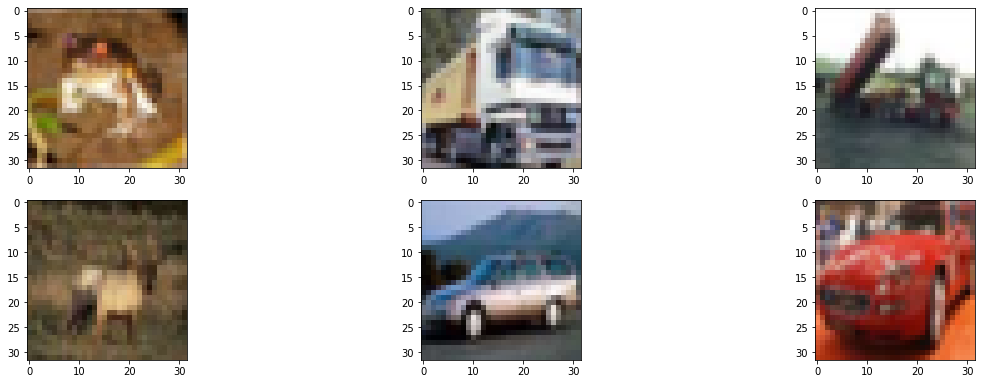

In [7]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(augmented_data[i])
plt.show()

## Model

### Sequential model layers

In [8]:
def Model():
  model = keras.Sequential([
                            keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (32,32,3)),
                            keras.layers.BatchNormalization(),                            
                            keras.layers.MaxPool2D(2, 2),
                            keras.layers.Dropout(.2),

                            keras.layers.Conv2D(64, (3,3), activation='relu'),
                            keras.layers.BatchNormalization(),                            
                            keras.layers.MaxPool2D(2, 2),
                            keras.layers.Dropout(.2),

                            keras.layers.Conv2D(128, (3,3), activation='relu'),
                            keras.layers.BatchNormalization(),                            
                            keras.layers.MaxPool2D(2, 2),
                            keras.layers.Dropout(.2),

                            keras.layers.Flatten(),
                            keras.layers.Dense(128, activation='relu'),
                            keras.layers.Dense(10, activation='softmax')
  ])

  print(model.summary())
  return model

### Create a Model and View the model summary

In [9]:
model = Model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       2

### Optimizer and Compile the model

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

###  Train The model

In [11]:
model.fit(
    train_images, train_labels,
    epochs=150,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/150
3125/3125 [==============================] - 69s 12ms/step - loss: 1.3001 - accuracy: 0.5368 - val_loss: 1.1343 - val_accuracy: 0.5949
Epoch 2/150
3125/3125 [==============================] - 38s 12ms/step - loss: 0.9493 - accuracy: 0.6657 - val_loss: 1.1017 - val_accuracy: 0.6176
Epoch 3/150
3125/3125 [==============================] - 37s 12ms/step - loss: 0.8313 - accuracy: 0.7076 - val_loss: 1.2026 - val_accuracy: 0.6193
Epoch 4/150
3125/3125 [==============================] - 39s 12ms/step - loss: 0.7604 - accuracy: 0.7333 - val_loss: 0.7698 - val_accuracy: 0.7376
Epoch 5/150
3125/3125 [==============================] - 37s 12ms/step - loss: 0.7081 - accuracy: 0.7522 - val_loss: 0.9724 - val_accuracy: 0.6692
Epoch 6/150
3125/3125 [==============================] - 38s 12ms/step - loss: 0.6729 - accuracy: 0.7653 - val_loss: 0.7249 - val_accuracy: 0.7538
Epoch 7/150
3125/3125 [==============================] - 38s 12ms/step - loss: 0.6410 - accuracy: 0.7755 - val_loss: 0

### Save the model

In [14]:
model.save("CIFAR10_150epoch.h5")